In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/catsvsdogs/archive (4).zip'  # Adjust the path
extract_folder = '/content/drive/My Drive/catsvsdogs/'  # Destination folder

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset unzipped!")


Dataset unzipped!


In [ ]:
import os

# Check the structure of the 'train' folder
train_dir = '/content/drive/MyDrive/catsvsdogs/train'
print("Train directory contents:", os.listdir(train_dir))

# Check the structure of the 'test' folder
test_dir = '/content/drive/MyDrive/catsvsdogs/test'
print("Test directory contents:", os.listdir(test_dir))


Train directory contents: ['cats', 'dogs']
Test directory contents: ['cats', 'dogs']


In [ ]:
import os

# Paths to train and test directories
train_dir = '/content/drive/MyDrive/catsvsdogs/train'
test_dir = '/content/drive/MyDrive/catsvsdogs/test'

def count_images_in_folder(folder_path):
    # Dictionary to store counts for each subfolder
    image_counts = {}
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            # Count all files in the subfolder
            image_counts[subfolder] = len([
                f for f in os.listdir(subfolder_path)
                if os.path.isfile(os.path.join(subfolder_path, f))
            ])
    return image_counts

# Count images in train and test directories
train_image_counts = count_images_in_folder(train_dir)
test_image_counts = count_images_in_folder(test_dir)

print("Train Image Counts:", train_image_counts)
print("Test Image Counts:", test_image_counts)


Train Image Counts: {'cats': 10000, 'dogs': 10000}
Test Image Counts: {'cats': 2500, 'dogs': 2500}


In [ ]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
import numpy as np
import pandas as pd

# Run the test harness for evaluating a model
def run_test_harness():
    model = define_model()
    datagen = ImageDataGenerator(rescale=1.0/255.0)

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        '/content/drive/MyDrive/catsvsdogs/train',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    test_it = datagen.flow_from_directory(
        '/content/drive/MyDrive/catsvsdogs/test/',
        batch_size=32,
        target_size=(200, 200),
        class_mode='binary'
    )

    # Store accuracy and loss values
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []

    # Fit the model with correct steps_per_epoch and validation_steps
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=40,
    )

    # Extract accuracy and loss values for each epoch
    for epoch in range(40):  # assuming 40 epochs
        train_acc.append(history.history['accuracy'][epoch])
        val_acc.append(history.history['val_accuracy'][epoch])
        train_loss.append(history.history['loss'][epoch])
        val_loss.append(history.history['val_loss'][epoch])

    # Save the values in a DataFrame or CSV
    data = {
        'Epoch': np.arange(1, 41),
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    df = pd.DataFrame(data)
    df.to_csv('/content/training_history.csv', index=False)  # Save to CSV in the Colab directory

    print(df)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_from_csv(file_path):
    # Read the CSV file
    data = pd.read_csv(file_path)

    # Check if required columns exist
    required_columns = {"Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"}
    if not required_columns.issubset(data.columns):
        print(f"CSV file must contain the columns: {required_columns}")
        return

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data['Epoch'], data['Train Accuracy'], label='Train Accuracy', marker='o')
    plt.plot(data['Epoch'], data['Val Accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(data['Epoch'], data['Train Loss'], label='Train Loss', marker='o')
    plt.plot(data['Epoch'], data['Val Loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

In [ ]:
run_test_harness()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 276s 231ms/step - accuracy: 0.5023 - loss: 0.8756 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 216ms/step - accuracy: 0.5042 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 215ms/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 214ms/step - accuracy: 0.4958 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 213ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.4985 - loss: 0.69

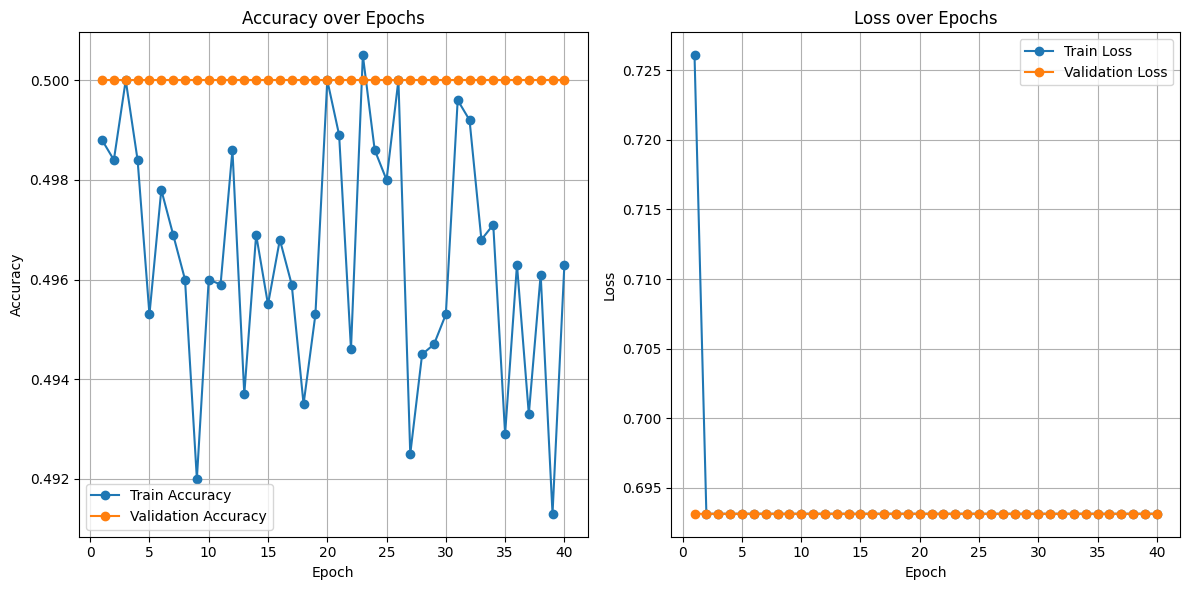

In [ ]:
plot_from_csv('/content/training_history.csv')